In [7]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [8]:
alldata, label_true = load_data('gaussian2d') # iris
pca_painter = PaintPCA(alldata)

Variance explained by first 2 principal components: [0.70041268 0.29958732]


Category 1 is too small
Category 2 is too small
Category 2 is too small
Category 2 is too small
Category 4 is too small
Category 5 is too small
Category 2 is too small
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 2 is too small
Category 6 is too small
Category 2 is too small
Category 6 is too small
Category 8 is too small
Category 2 is too small
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 9 is too small
Category 6 is too small
Category 9 is too small
Category 10 is too small


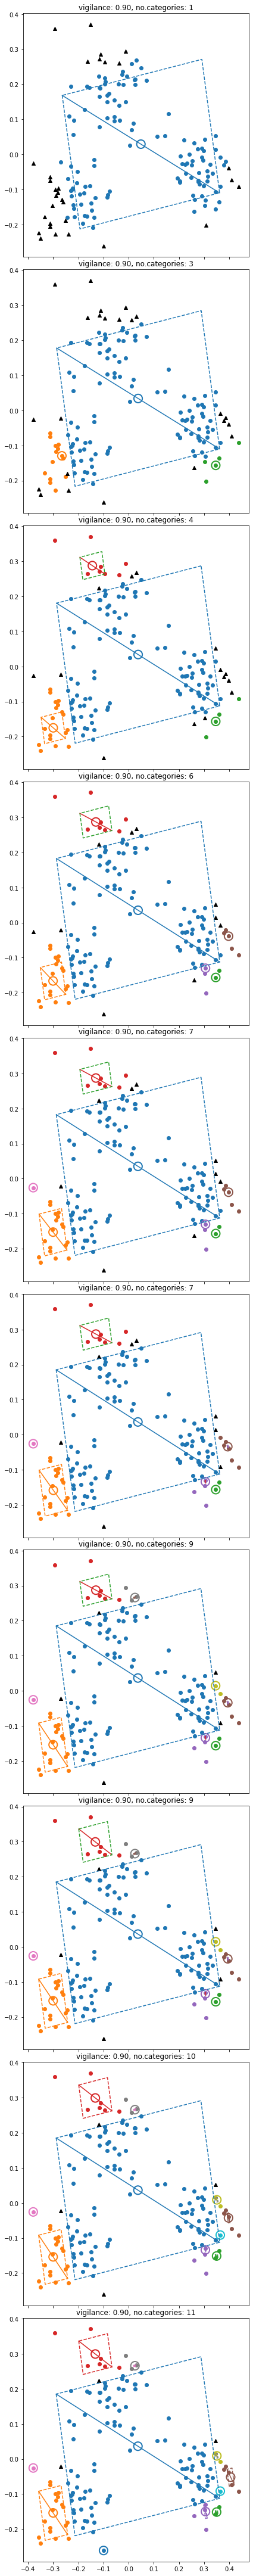

In [10]:
np.random.shuffle(alldata)

no_epoch = 10
fig, axs = plt.subplots(no_epoch, 1,
                        figsize = (6, 6 * no_epoch), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
#pca_painter.scatter(axs[0], label_true)
#axs[0].set_title("true data")

# init
rho=0.9
net = FuzzyART(alpha=0.5)

for ax, data in zip(axs, alldata.reshape(no_epoch, -1, 2)):    
    
    # train
    net.train(data) # each epoch, all data is shuffled
    label_predall = net.test(alldata)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
# save fig
simname = 'var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
#savefigure_datetime(fig, simname, dirname)



In [4]:
net.w

array([[0.05082139, 0.00978755, 0.32458851, 0.61646919],
       [0.04704388, 0.40889602, 0.89442208, 0.48000614],
       [0.01095815, 0.27163077, 0.98282597, 0.7276701 ],
       [0.76063564, 0.01329877, 0.22339915, 0.96943087],
       [0.02328453, 0.12627178, 0.96868564, 0.85098837],
       [0.73637413, 0.1891187 , 0.26362587, 0.8108813 ],
       [0.34687928, 0.49310005, 0.65312072, 0.50689995],
       [0.69016338, 0.10476331, 0.30983662, 0.89523669],
       [0.6967302 , 0.16588958, 0.3032698 , 0.83411042],
       [0.02381898, 0.36060048, 0.97462219, 0.63178293],
       [0.56477679, 0.00202828, 0.43522321, 0.99797172],
       [0.68256298, 0.00571838, 0.31743702, 0.99428162],
       [0.15348857, 0.40528546, 0.84651143, 0.59471454]])

In [5]:
label_predall[-5:]

array([[ 0.,  1.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0.,  2.],
       [12., -1.]])

In [6]:
label_pred[-5:]

array([ 0,  0,  0,  0, 12])